In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import os

## Active Transmitters

Download today's data

In [58]:
! rm data.csv
! wget -O data.csv https://opendata.ecdc.europa.eu/covid19/casedistribution/csv --no-check-certificate

--2020-04-02 10:09:30--  https://opendata.ecdc.europa.eu/covid19/casedistribution/csv
Resolving opendata.ecdc.europa.eu (opendata.ecdc.europa.eu)... 212.181.0.63
Connecting to opendata.ecdc.europa.eu (opendata.ecdc.europa.eu)|212.181.0.63|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/ [following]
--2020-04-02 10:09:32--  https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/
Reusing existing connection to opendata.ecdc.europa.eu:443.
HTTP request sent, awaiting response... 200 OK
Length: 426136 (416K) [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>] 416.15K   446KB/s    in 0.9s    

2020-04-02 10:09:33 (446 KB/s) - ‘data.csv’ saved [426136/426136]



In [59]:
today_day = date.today().day
today_month = date.today().month
#url="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-"+"{0:0=2d}".format(today_month)+"-"+"{0:0=2d}".format(today_day)+".csv"
#! wget $url --no-check-certificate

In [60]:
#data_fname = 'COVID-19-geographic-disbtribution-worldwide-2020-'+"{0:0=2d}".format(today_month)+"-"+"{0:0=2d}".format(today_day)+'.xlsx'
dat = pd.read_csv('data.csv',encoding='iso-8859-1')
dat.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,02/04/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
1,01/04/2020,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
2,31/03/2020,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
3,30/03/2020,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
4,29/03/2020,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0


In [61]:
name_dict = {#'Canada':'Canada',
            'South_Korea':'Republic of Korea',
            'Iran':'Iran (Islamic Republic of)',
            'Italy':'Italy',
            'United_States_of_America':'United States of America (and dependencies)',
            'China':'China'}
Countries = list(name_dict.keys())

If we assume a 30 day window of transmission, i.e. after 30 days the virus is no longer transmissible, then we can obtain a value for the # of active transmitters by taking the difference between the cumulative cases up to today and the cumulative cases from 30 days ago

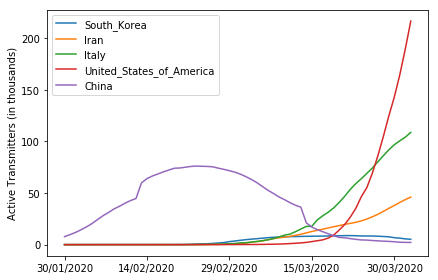

In [64]:
#dat['dateRep']= pd.to_datetime(dat['dateRep'],format='%Y%-d%-m')
fig, ax = plt.subplots()
for c in Countries:
    # find all rows corresponding to country c
    DF = dat[dat['countriesAndTerritories']==c].sort_values(['year','month','day'])
    
    # cumulative sum of cases - cumulative sum of cases 30 days ago
    # i.e. all new cases from the past 30 days
    DF['DiffCases'] = DF['cases'].cumsum().diff(30)/1000
    DF = DF[['dateRep','DiffCases']].dropna()

    plt.plot(DF['dateRep'],DF['DiffCases'])
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.tight_layout()
plt.legend(Countries)
plt.ylabel('Active Transmitters (in thousands)')
plt.show()

## Active transmitters as a % of total population

In [65]:
world_pop = pd.read_csv('world_population.csv')
world_pop_2020 = world_pop[world_pop['Time']==2020]
world_pop = world_pop_2020[world_pop_2020['Variant']=='Medium']
world_pop[world_pop['Location']=='Canada']['PopTotal']*1000

38752    37742157.0
Name: PopTotal, dtype: float64

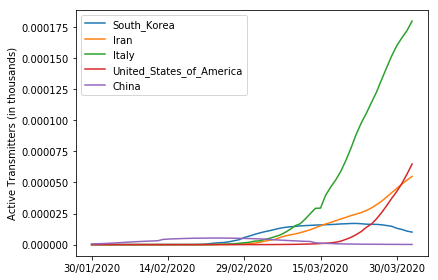

In [66]:
#dat['dateRep']= pd.to_datetime(dat['dateRep'],format='%Y%-d%-m')
fig, ax = plt.subplots()
for c in Countries:
    NationPop = world_pop[world_pop['Location']==name_dict[c]]['PopTotal']*1000
    NationPop = list(NationPop)[0]
    # find all rows corresponding to country c
    DF = dat[dat['countriesAndTerritories']==c].sort_values(['year','month','day'])
    
    # cumulative sum of cases - cumulative sum of cases 30 days ago
    # i.e. all new cases from the past 30 days
    DF['DiffCases'] = DF['cases'].cumsum().diff(30)/1000
    DF = DF[['dateRep','DiffCases']].dropna()
    DF['FracPop'] = DF['DiffCases']/NationPop*100

    plt.plot(DF['dateRep'],DF['FracPop'])
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.tight_layout()
plt.legend(Countries)
plt.ylabel('Active Transmitters (in thousands)')
plt.show()

In [67]:
#world_pop['Location'].unique()

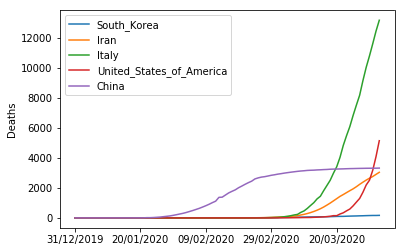

In [68]:
fig, ax = plt.subplots()
for c in Countries:
    # find all rows corresponding to country c
    DF = dat[dat['countriesAndTerritories']==c].sort_values(['year','month','day'])
    
    # cumulative sum of cases - cumulative sum of cases 30 days ago
    # i.e. all new cases from the past 30 days

    plt.plot(DF['dateRep'],DF['deaths'].cumsum())
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.legend(Countries)
plt.ylabel('Deaths')
plt.show()

## Fatality rate, # of cases

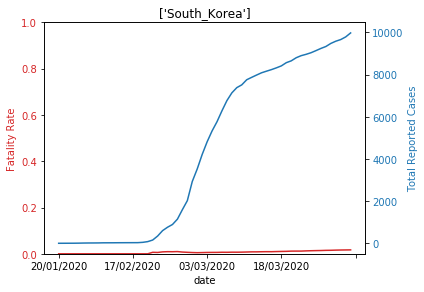

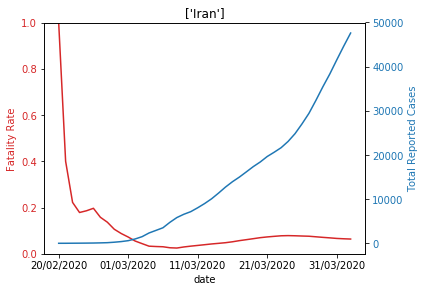

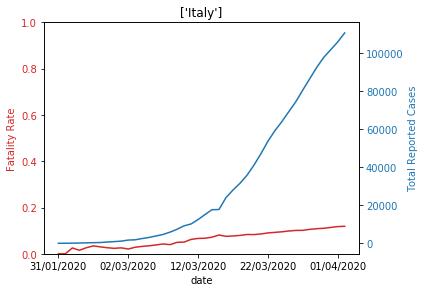

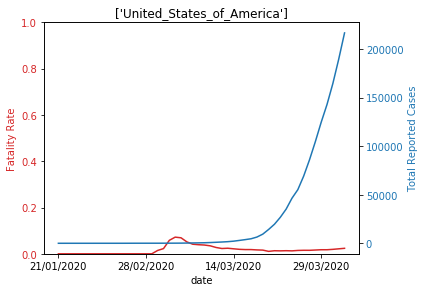

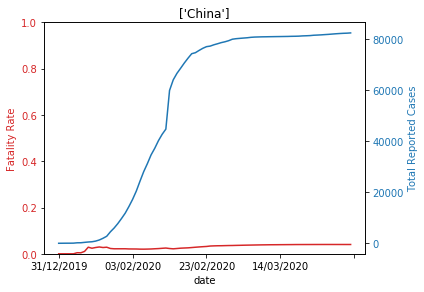

In [82]:
for c in Countries:
    DF = dat[dat['countriesAndTerritories']==c].sort_values(['year','month','day'])
    DF['CasesSum'] = DF['cases'].cumsum()
    DF = DF[DF['cases']>0]
    DF['Fatality Rate'] = DF['deaths'].cumsum()/DF['cases'].cumsum()
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('date')
    ax1.set_ylabel('Fatality Rate', color=color)
    ax1.plot(DF['dateRep'],DF['Fatality Rate'],color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.set_ylim((0,1))

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:blue'
    ax2.set_ylabel('Total Reported Cases', color=color)  # we already handled the x-label with ax1
    ax2.plot(DF['dateRep'], DF['cases'].cumsum(), color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title([c])
    ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()
    
    

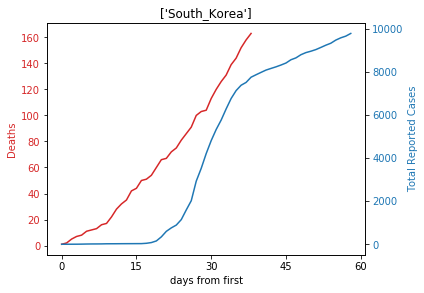

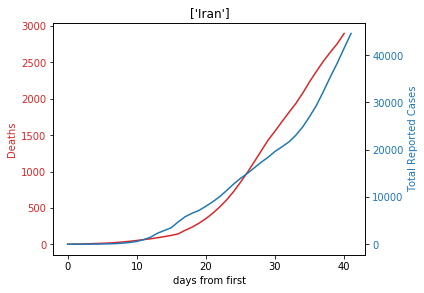

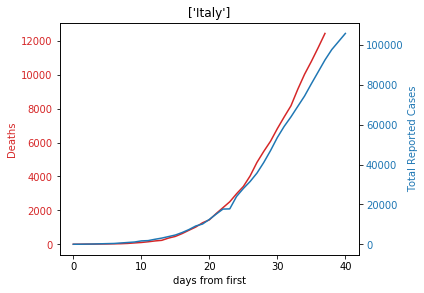

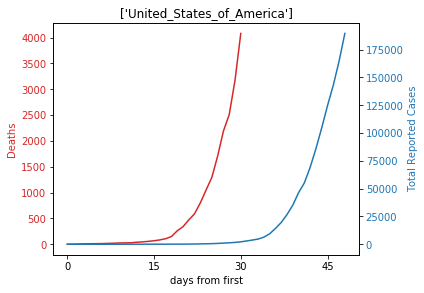

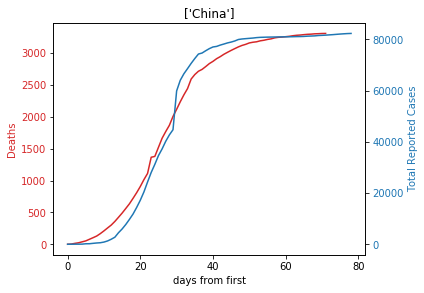

In [56]:
for c in Countries:
    DF = dat[dat['countriesAndTerritories']==c].sort_values(['year','month','day'])
    DF['CasesSum'] = DF['cases'].cumsum()
    DF = DF[DF['cases']>0].reset_index(drop=True)
    #DF['normalized_date'] = DF.index/max(DF.index)
    DF_death = DF[DF['deaths']>0].reset_index(drop=True)
    #DF_death['normalized_date'] = DF_death.index/max(DF_death.index)
    
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('days from first')
    ax1.set_ylabel('Deaths', color=color)
    ax1.plot(DF_death.index,DF_death['deaths'].cumsum(),color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.xaxis.set_major_locator(plt.MaxNLocator(5))

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:blue'
    ax2.set_ylabel('Total Reported Cases', color=color)  # we already handled the x-label with ax1
    ax2.plot(DF.index, DF['cases'].cumsum(), color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title([c])
    ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()
    

## Project total # of future cases using a sigmoid fit of China's data

Fit a sigmoid: $S(x) = \frac{1}{1+e^{-a(x-b)}}$

We'll make x the # of days since first case

In [83]:
from scipy.optimize import curve_fit
def fsigmoid(x, a, b):
    return 1.0 / (1.0 + np.exp(-a*(x-b)))

In [84]:
CN = dat[dat['countriesAndTerritories']=='China'].sort_values(['year','month','day'])
CN['CumulativeCases'] = CN['cases'].cumsum()
CN = CN[CN['CumulativeCases']>0].reset_index(drop=True)
CN['NormalizedCumulativeCases'] = CN['CumulativeCases']/max(CN['CumulativeCases'])
CN['NormalizedDays'] = CN.index/max(CN.index)

X_CN = CN.index
Y_CN = CN['NormalizedCumulativeCases']

In [85]:
popt, pcov = curve_fit(fsigmoid, X_CN,Y_CN)

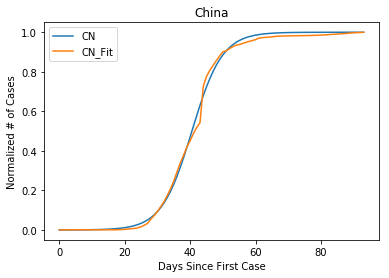

In [86]:
# fit for China
Y_hat_CN = fsigmoid(X_CN,popt[0],popt[1])
fig,ax = plt.subplots()
plt.plot(X_CN,Y_hat_CN)
plt.plot(X_CN,Y_CN)
plt.legend(['CN','CN_Fit'])
ax.set_xlabel('Days Since First Case')
ax.set_ylabel('Normalized # of Cases')
plt.title('China')
plt.show()

In [87]:
#Get US data
US = dat[dat['countriesAndTerritories']=='United_States_of_America'].sort_values(['year','month','day'])
US['CumulativeCases'] = US['cases'].cumsum()
US = US[US['CumulativeCases']>0].reset_index(drop=True)
US['NormalizedCumulativeCases'] = US['CumulativeCases']/(max(US['CumulativeCases']))
X_US = US.index
Y_US = US['NormalizedCumulativeCases']

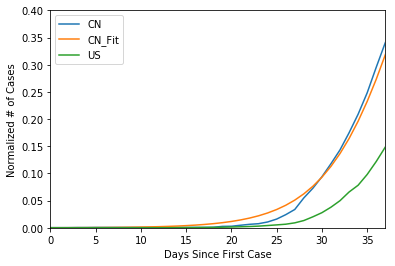

In [88]:
fig,ax = plt.subplots()
plt.plot(X_CN,Y_CN)
plt.plot(X_CN,Y_hat_CN)
plt.plot(X_US-30,Y_US/3.25578557)
#plt.plot(X_US,Y_US)

plt.legend(['CN','CN_Fit','US'])
ax.set_xlabel('Days Since First Case')
ax.set_ylabel('Normalized # of Cases')
ax.set_ylim((0,.4))
ax.set_xlim((0,37))
plt.show()

In [90]:
def MSE_beta(beta,Y_US,Y_hat_CN):
    return np.sum(((Y_US/beta)-Y_hat_CN)**2)/len(Y_US)

In [92]:
from scipy.optimize import minimize
res = minimize(MSE_beta, [3],args = (shifted_Y,truncated_Y_hat_CN))
res

      fun: 0.000388129844270427
 hess_inv: array([[36.46818376]])
      jac: array([7.33828347e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 4
     njev: 12
   status: 0
  success: True
        x: array([1.59686682])

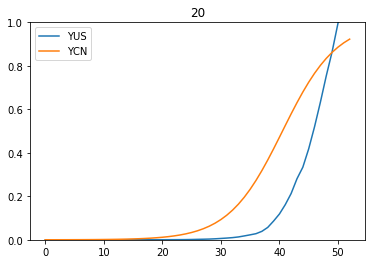

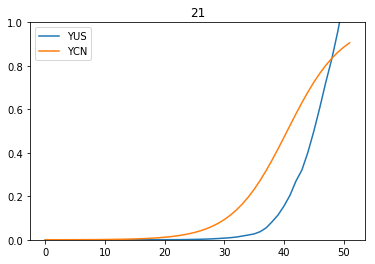

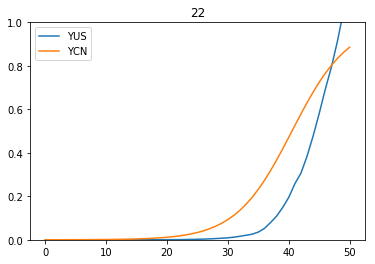

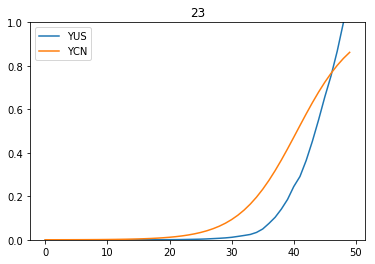

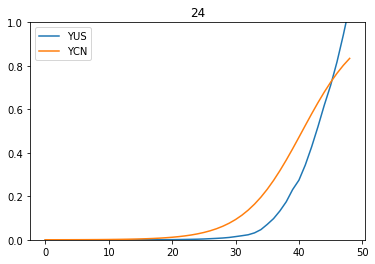

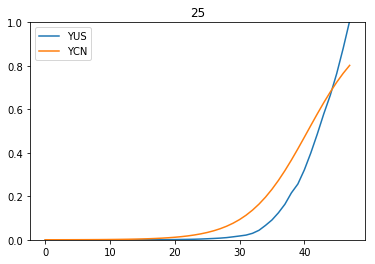

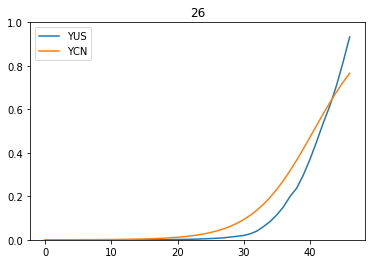

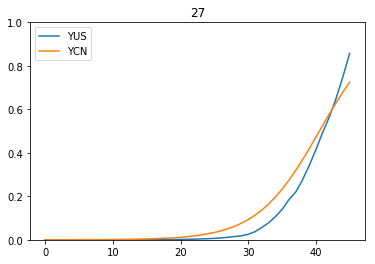

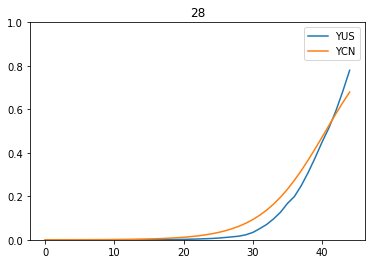

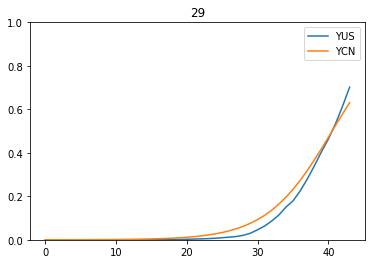

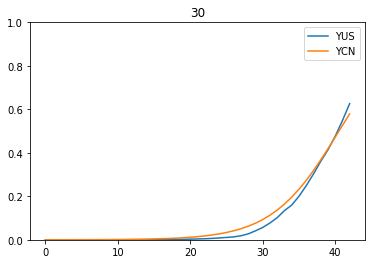

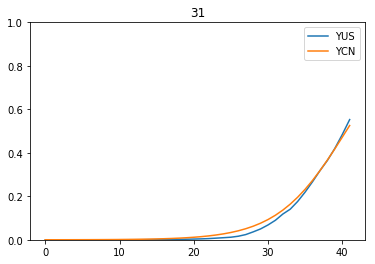

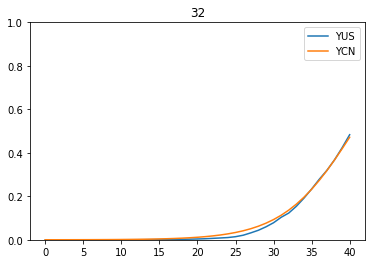

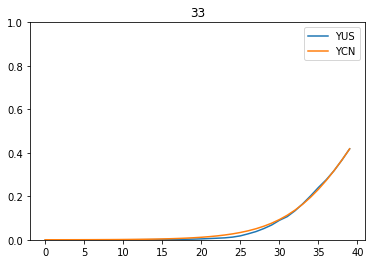

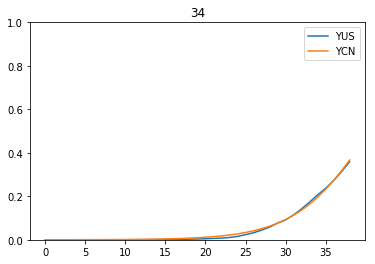

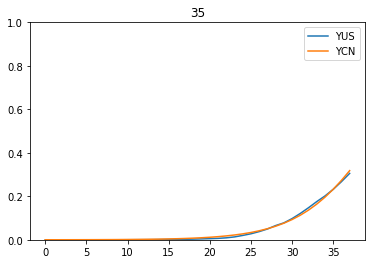

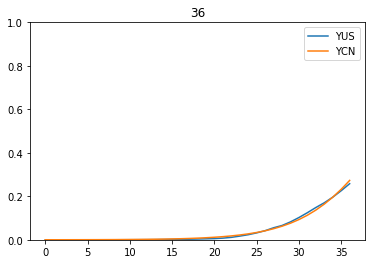

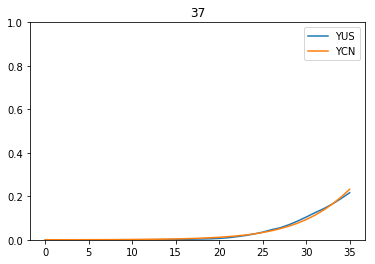

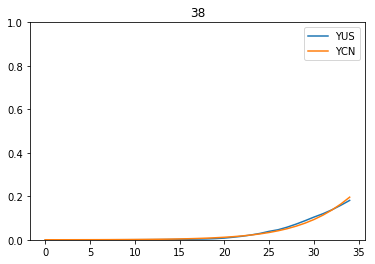

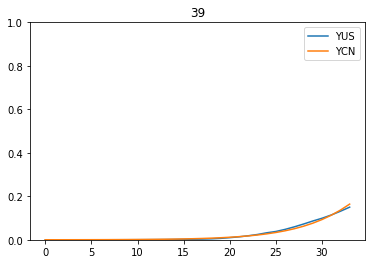

In [93]:
shift_vals = range(20,40)
beta = []
err = []

for shift in shift_vals:
    shifted_Y = Y_US[shift:].reset_index(drop=True)
    truncated_Y_hat_CN = Y_hat_CN[:len(Y_US[shift:])]
    res = minimize(MSE_beta, [3],args = (shifted_Y,truncated_Y_hat_CN))
    fig,ax = plt.subplots()
    plt.plot(range(len(shifted_Y)),shifted_Y/res.x[0],range(len(shifted_Y)),truncated_Y_hat_CN)
    plt.title(shift)
    plt.legend(['YUS','YCN'])
    ax.set_ylim((0,1))
    plt.show()
    beta.append(res.x[0])
    
    err.append(np.sum((shifted_Y/res.x[0])-truncated_Y_hat_CN)**2)

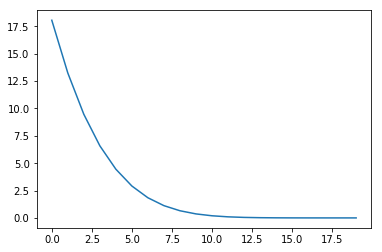

In [94]:
plt.plot(err)

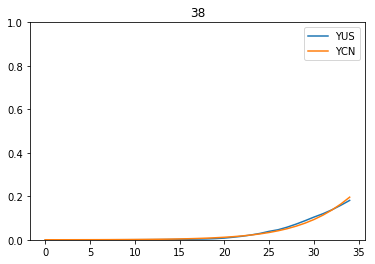

In [95]:
shift = shift_vals[np.argmin(err)]

shifted_Y = Y_US[shift:].reset_index(drop=True)
truncated_Y_hat_CN = Y_hat_CN[:len(Y_US[shift:])]
res = minimize(MSE_beta, [3],args = (shifted_Y,truncated_Y_hat_CN))
fig,ax = plt.subplots()
plt.plot(range(len(shifted_Y)),shifted_Y/res.x[0],range(len(shifted_Y)),truncated_Y_hat_CN)
plt.title(shift)
plt.legend(['YUS','YCN'])
ax.set_ylim((0,1))
plt.show()


Note: as time has gone on, the US no longer fits China's data near the first inflection point, as its rate of increase is much more rapid than China's